In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
order = pd.read_csv("Data/order.csv")

In [ ]:
# Next step: Order date analyse
# user counts
# limit sum
# result sum
# term ... 

In [4]:
order.date.value_counts()


1533    559
1539    522
1540    516
1524    501
1447    486
1526    482
1517    472
1538    466
1525    464
1532    462
1518    459
1541    457
1542    448
1519    445
1527    442
1514    437
1513    434
1531    432
1448    431
1511    423
1512    418
1545    417
1534    416
1528    415
1520    413
1387    410
1546    409
1498    406
1484    403
1483    401
       ... 
788      53
808      52
889      46
759      44
1254     38
1253     32
764      26
890      25
766      24
1252     23
1245     22
891      21
1250     20
765      19
1249     19
898      18
1246     18
760      16
1251     16
763      14
897      14
1247     14
762      12
761      10
892       9
896       8
1248      7
894       6
893       6
895       5
Name: date, Length: 793, dtype: int64

In [11]:
order_sum = order.groupby(['date']).sum()
order_sum2 = order_sum.reset_index()
order_sum2.head()

,date,term,limit,result
0,754,3855,3847.0,17
1,755,3584,3587.0,14
2,756,2781,1253.0,10
3,757,2202,5125.0,3
4,758,1932,1222.0,10


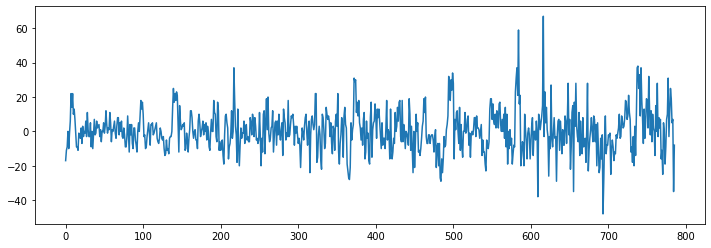

In [24]:
X0 = order_sum2.result
diff0 = list()
for i in range(7, len(X0)):
    value0 = X0[i] - X0[i - 7]
    diff0.append(value0)
plt.figure(figsize=(12,4)) 
plt.plot(diff0)
plt.show()

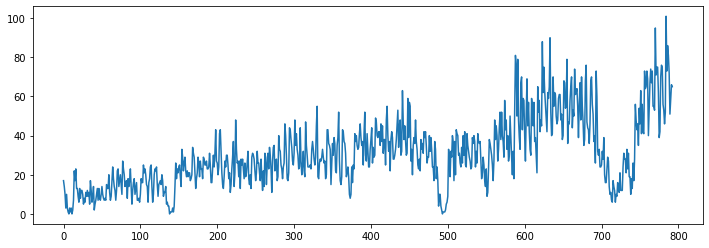

In [23]:
plt.figure(figsize=(12,4)) 
plt.plot(X0)

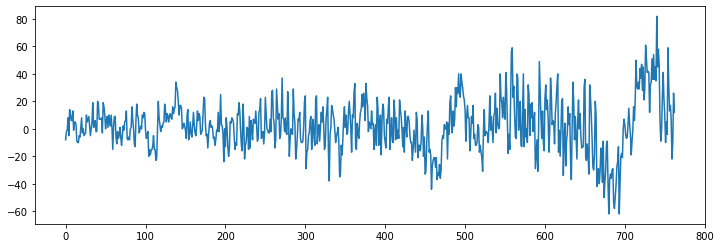

In [25]:
X1 = order_sum2.result
diff1 = list()
for i in range(30, len(X1)):
    value1 = X1[i] - X1[i - 30]
    diff1.append(value1)
plt.figure(figsize=(12,4)) 
plt.plot(diff1)
plt.show()

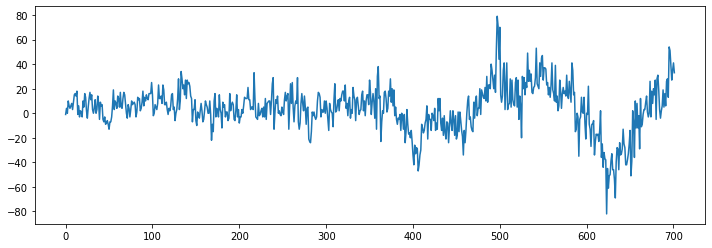

In [26]:
X2 = order_sum2.result
diff2 = list()
for i in range(91, len(X2)):
    value2 = X2[i] - X2[i - 91]
    diff2.append(value2)
plt.figure(figsize=(12,4)) 
plt.plot(diff2)
plt.show()

In [6]:
order.groupby(['date', 'term']).sum()

limit  result
date term                
754  1      205.0       2
     3        5.0       0
     6       57.0       1
     10       5.0       0
     12    2372.0       7
     24     293.0       3
     36     376.0       3
     48      45.0       1
     60      22.0       0
     120    100.0       0
     180     60.0       0
     240     42.0       0
     300    265.0       0
755  2      200.0       0
     6      302.0       0
     12    2251.0       9
     24     185.0       2
     36     234.0       3
     60      10.0       0
     120    100.0       0
     240    160.0       0
     360    145.0       0
756  3       10.0       0
     6        2.0       0
     12     480.0       5
     18      35.0       0
     24     144.0       2
     36     262.0       3
     48      10.0       0
     120     50.0       0
...           ...     ...
1544 30     730.0       0
     36     471.8      11
     48      90.0       0
     60      30.0       0
1545 3        5.0       1
     6       41.0       0
     12    3806.0      43
     20     599.2       0
     24     329.0      10
     30     476.0       0
     36     880.0      11
     48      43.0       1
     60     170.0       0
     120    230.0       0
1546 1       10.0       0
     2       20.0       0
     3      300.0       0
     4      200.0       0
     6       77.0       2
     12    2206.0      36
     18      25.0       0
     20     157.0       0
     24     509.0      12
     25      60.0       0
     30     395.0       0
     36    1245.0      14
     40       6.0       0
     48      90.0       1
     60     110.0       0
     120    250.0       0

[8385 rows x 2 columns]

In [9]:
order.groupby(['date', 'term']).count()

user_id  product_id  limit  result
date term                                    
754  1           2           2      2       2
     3           1           1      1       1
     6           4           4      4       4
     10          1           1      1       1
     12         80          80     80      80
     24         23          23     23      23
     36         25          25     25      25
     48          3           3      3       3
     60          2           2      2       2
     120         1           1      1       1
     180         1           1      1       1
     240         1           1      1       1
     300         2           2      2       2
755  2           1           1      1       1
     6           3           3      3       3
     12         76          76     76      76
     24         17          17     17      17
     36         24          24     24      24
     60          1           1      1       1
     120         1           1      1       1
     240         2           2      2       2
     360         2           2      2       2
756  3           1           1      1       1
     6           2           2      2       2
     12         53          53     53      53
     18          3           3      3       3
     24         15          15     15      15
     36         23          23     23      23
     48          1           1      1       1
     120         1           1      1       1
...            ...         ...    ...     ...
1544 30          8           8      8       8
     36         49          49     49      49
     48          4           4      4       4
     60          1           1      1       1
1545 3           1           1      1       1
     6           4           4      4       4
     12        280         280    280     280
     20          6           6      6       6
     24         46          46     46      46
     30          2           2      2       2
     36         63          63     63      63
     48          5           5      5       5
     60          7           7      7       7
     120         3           3      3       3
1546 1           1           1      1       1
     2           1           1      1       1
     3           1           1      1       1
     4           1           1      1       1
     6           6           6      6       6
     12        258         258    258     258
     18          2           2      2       2
     20          2           2      2       2
     24         50          50     50      50
     25          1           1      1       1
     30          4           4      4       4
     36         67          67     67      67
     40          1           1      1       1
     48          6           6      6       6
     60          3           3      3       3
     120         5           5      5       5

[8385 rows x 4 columns]

In [ ]:
order.groupby(['date', 'term']).count()